In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import re
import string
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
!pip install emoji
import emoji
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder
import os
import seaborn as sns
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 15.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
import os
df = pd.read_csv('/content/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# Check Data Shape
df.shape

(5572, 2)

In [4]:
# Check Null Values
df.isnull().sum()

,0
Category,0
Message,0


In [5]:
# Find Duplicate
df.duplicated().any()

np.True_

In [6]:
# drop Duplicates
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().any()

np.False_

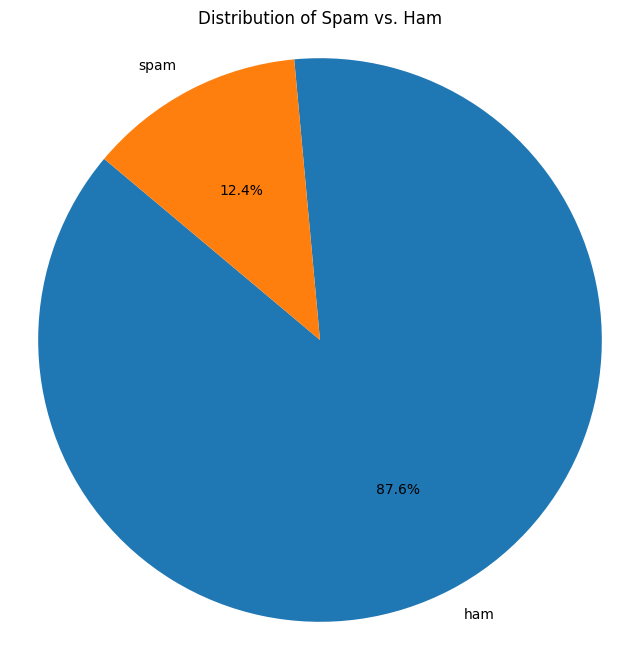

In [8]:
# Calculate the count of each label
category_counts = df['Category'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Spam vs. Ham')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

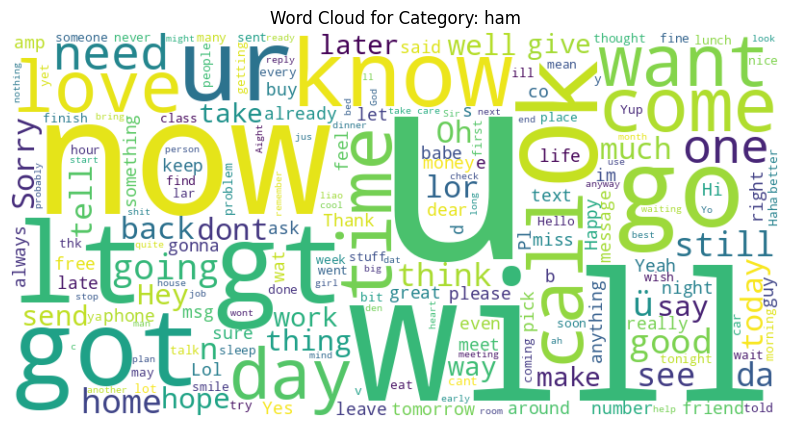

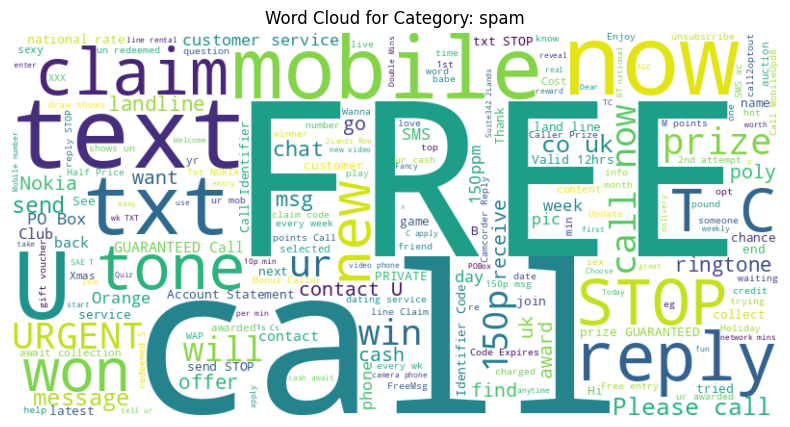

In [9]:
# Iterate through unique categories
for category in df['Category'].unique():
    # Filter the DataFrame for the current category
    filtered_df = df[df['Category'] == category]

    # Concatenate all text data for the current category
    text = ' '.join(filtered_df['Message'])

    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Category: {category}')
    plt.axis('off')
    plt.show()

In [10]:
# Encode Category column
le = LabelEncoder()
df['Category']=le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# Convert 'Text' column to lowercase
df['Message'] = df['Message'].str.lower()
df.head()
# Remove extra white spaces from the 'Text' column
df['Message'] = df['Message'].str.strip()
df.head()
# Function to remove HTML tags from text
def remove_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

# Remove HTML tags from 'Text' column
df['Message'] = df['Message'].apply(remove_html_tags)
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [12]:
# Define a function to remove URLs using regular expressions
def remove_urls(text):
    return re.sub(r'http\S+|www\S+', '', text)

# Apply the function to the 'Text' column
df['Message'] = df['Message'].apply(remove_urls)
df.head()

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [13]:
string.punctuation

# Define the punctuation characters to remove
punctuation = string.punctuation
# Function to remove punctuation from text
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', punctuation))

# Apply remove_punctuation function to 'Text' column
df['Message'] = df['Message'].apply(remove_punctuation)
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [14]:
def remove_special_characters(text):
    # Define the pattern to match special characters
    pattern = r'[^a-zA-Z0-9\s]'  # Matches any character that is not alphanumeric or whitespace

    # Replace special characters with an empty string
    clean_text = re.sub(pattern, '', text)

    return clean_text

# Apply the function to the 'Message' column
df['Message'] = df['Message'].apply(remove_special_characters)

In [15]:
# Function to remove numeric values from text
def remove_numeric(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_numeric)
df.head()

,Category,Message
0,0,go until jurong point crazy available only in ...
1,0,ok lar joking wif u oni
2,1,free entry in a wkly comp to win fa cup final...
3,0,u dun say so early hor u c already then say
4,0,nah i dont think he goes to usf he lives aroun...


In [16]:
# Define a function to remove non-alphanumeric characters
def remove_non_alphanumeric(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

# Apply the function to the "Message" column
df['Message'] = df['Message'].apply(remove_non_alphanumeric)

In [17]:
# Define a dictionary of chat word mappings
chat_words = {
    "y": "you",
    "r": "are",
    "b4": "before",
    "gr8": "great",
    "l8r": "later",
    "pls": "please",
    "thx": "thanks",
    "afaiK": "As Far As I Know",
    "afk": "Away From Keyboard",
    "asap": "As Soon As Possible",
    "atk": "At The Keyboard",
    "atm": "At The Moment",
    "a3": "Anytime, Anywhere, Anyplace",
    "bak": "Back At Keyboard",
    "bbl": "Be Back Later",
    "bbs": "Be Back Soon",
    "bfn": "Bye For Now",
    "b4n": "Bye For Now",
    "brb": "Be Right Back",
    "brt": "Be Right There",
    "btw": "By The Way",
    "b4": "Before",
    "b4n": "Bye For Now",
    "cu": "See You",
    "cul8r": "See You Later",
    "cya": "See You",
    "faq": "Frequently Asked Questions",
    "fc": "Fingers Crossed",
    "fwiw": "For What It's Worth",
    "fyi": "For Your Information",
    "gal": "Get A Life",
    "gg": "Good Game",
    "gn": "Good Night",
    "gmta": "Great Minds Think Alike",
    "gr8": "Great!",
    "g9": "Genius",
    "ic": "I See",
    "icq": "I Seek you (also a chat program)",
    "ilu": "ILU: I Love You",
    "imho": "In My Honest/Humble Opinion",
    "imo": "In My Opinion",
    "iow": "In Other Words",
    "irl": "In Real Life",
    "kiss": "Keep It Simple, Stupid",
    "ldr": "Long Distance Relationship",
    "lmao": "Laugh My A.. Off",
    "lol": "Laughing Out Loud",
    "ltns": "Long Time No See",
    "l8r": "Later",
    "mte": "My Thoughts Exactly",
    "m8": "Mate",
    "nrn": "No Reply Necessary",
    "oic": "Oh I See",
    "pita": "Pain In The A..",
    "prt": "Party",
    "prw": "Parents Are Watching",
    "qpsa?": "Que Pasa?",
    "rofl": "Rolling On The Floor Laughing",
    "roflol": "Rolling On The Floor Laughing Out Loud",
    "rotflmao": "Rolling On The Floor Laughing My A.. Off",
    "sk8": "Skate",
    "stats": "Your sex and age",
    "asl": "Age, Sex, Location",
    "thx": "Thank You",
    "ttfn": "Ta-Ta For Now!",
    "ttyl": "Talk To You Later",
    "u": "You",
    "u2": "You Too",
    "u4e": "Yours For Ever",
    "wb": "Welcome Back",
    "wtf": "What The F...",
    "wtg": "Way To Go!",
    "wuf": "Where Are You From?",
    "w8": "Wait...",
    "7k": "Sick:-D Laugher",
    "tfw": "That feeling when",
    "mfw": "My face when",
    "mrw": "My reaction when",
    "ifyp": "I feel your pain",
    "tntl": "Trying not to laugh",
    "jk": "Just kidding",
    "idc": "I don't care",
    "ily": "I love you",
    "imu": "I miss you",
    "adih": "Another day in hell",
    "zzz": "Sleeping, bored, tired",
    "wywh": "Wish you were here",
    "time": "Tears in my eyes",
    "bae": "Before anyone else",
    "fimH": "Forever in my heart",
    "bsaaW": "Big smile and a wink",
    "bwl": "Bursting with laughter",
    "bff": "Best friends forever",
    "csl": "Can't stop laughing"
    }

In [18]:
# Function to replace chat words with their full forms
def replace_chat_words(text):
    words = text.split()
    for i, word in enumerate(words):
        if word.lower() in chat_words:
            words[i] = chat_words[word.lower()]
    return ' '.join(words)

# Apply replace_chat_words function to 'Text' column
df['Message'] = df['Message'].apply(replace_chat_words)

In [19]:
# Download NLTK stopwords corpus
nltk.download('stopwords')

# Get English stopwords from NLTK
stop_words = set(stopwords.words('english'))

# Function to remove stop words from text
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply remove_stopwords function to 'Text' column
df['Message'] = df['Message'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# Function to remove emojis from text
def remove_emojis(text):
    return emoji.demojize(text)

# Apply remove_emojis function to 'Text' column
df['Message'] = df['Message'].apply(remove_emojis)

In [21]:
# Initialize the Porter Stemmer
porter_stemmer = PorterStemmer()

# Apply stemming
df['Message_stemmed'] = df['Message'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

In [22]:
# Initialize and Fitting CountVectorizer on X
count_vectorizer = CountVectorizer()
X_count = count_vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']

# Initialize and Fitting TFIDF Vectorizer on X
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Message_stemmed']).toarray()
y = df['Category']


# Train Test Split
X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(X_count, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [23]:
# Logistic Regression with CountVectorizer and tuned parameters
lr_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500)
lr_model.fit(X_train_count, y_train_count)
lr_pred_count = lr_model.predict(X_test_count)

# Logistic Regression with TFIDFVectorizer and tuned parameters
lr_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=500)
lr_model.fit(X_train_tfidf, y_train_tfidf)
lr_pred_tfidf = lr_model.predict(X_test_tfidf)


# Multinomial Naive Bayes with CountVectorizer and tuned parameters
mnb_model = MultinomialNB(alpha=0.1)
mnb_model.fit(X_train_count, y_train_count)
mnb_pred_count = mnb_model.predict(X_test_count)

# Multinomial Naive Bayes with TFIDFVectorizer and tuned parameters
mnb_model = MultinomialNB(alpha=0.1)
mnb_model.fit(X_train_tfidf, y_train_tfidf)
mnb_pred_tfidf = mnb_model.predict(X_test_tfidf)


# Gaussian Naive Bayes with CountVectorizer
gnb_model = GaussianNB()
gnb_model.fit(X_train_count, y_train_count)
gnb_pred_count = gnb_model.predict(X_test_count)

# Gaussian Naive Bayes with TFIDFVectorizer
gnb_model = GaussianNB()
gnb_model.fit(X_train_tfidf, y_train_tfidf)
gnb_pred_tfidf = gnb_model.predict(X_test_tfidf)


# Support Vector Machines (SVM) with CountVectorizer and tuned parameters
svm_model = SVC(C=10.0, kernel='rbf', gamma='auto')
svm_model.fit(X_train_count, y_train_count)
svm_pred_count = svm_model.predict(X_test_count)

# Support Vector Machines (SVM) with TFIDFVectorizer and tuned parameters
svm_model = SVC(C=10.0, kernel='rbf', gamma='auto')
svm_model.fit(X_train_tfidf, y_train_tfidf)
svm_pred_tfidf = svm_model.predict(X_test_tfidf)


# Decision Trees with CountVectorizer and tuned parameters
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
dt_model.fit(X_train_count, y_train_count)
dt_pred_count = dt_model.predict(X_test_count)

# Decision Trees with TFIDFVectorizer and tuned parameters
dt_model = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
dt_model.fit(X_train_tfidf, y_train_tfidf)
dt_pred_tfidf = dt_model.predict(X_test_tfidf)


# Random Forests with CountVectorizer and tuned parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10)
rf_model.fit(X_train_count, y_train_count)
rf_pred_count = rf_model.predict(X_test_count)

# Random Forests with TFIDFVectorizer and tuned parameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, min_samples_split=10)
rf_model.fit(X_train_tfidf, y_train_tfidf)
rf_pred_tfidf = rf_model.predict(X_test_tfidf)


# Gradient Boosting Classifier with CountVectorizer and tuned parameters
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5)
gb_model.fit(X_train_count, y_train_count)
gb_pred_count = gb_model.predict(X_test_count)

# Gradient Boosting Classifier with TFIDFVectorizer and tuned parameters
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=5)
gb_model.fit(X_train_tfidf, y_train_tfidf)
gb_pred_tfidf = gb_model.predict(X_test_tfidf)


# XGBoost Classifier with CountVectorizer and tuned parameters
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train_count, y_train_count)
xgb_pred_count = xgb_model.predict(X_test_count)

# XGBoost Classifier with TFIDFVectorizer and tuned parameters
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train_tfidf, y_train_tfidf)
xgb_pred_tfidf = xgb_model.predict(X_test_tfidf)


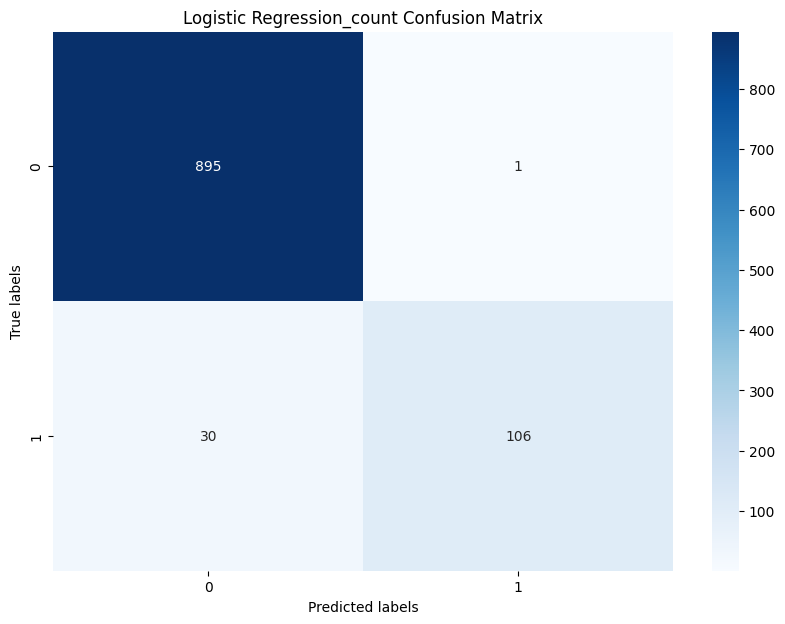

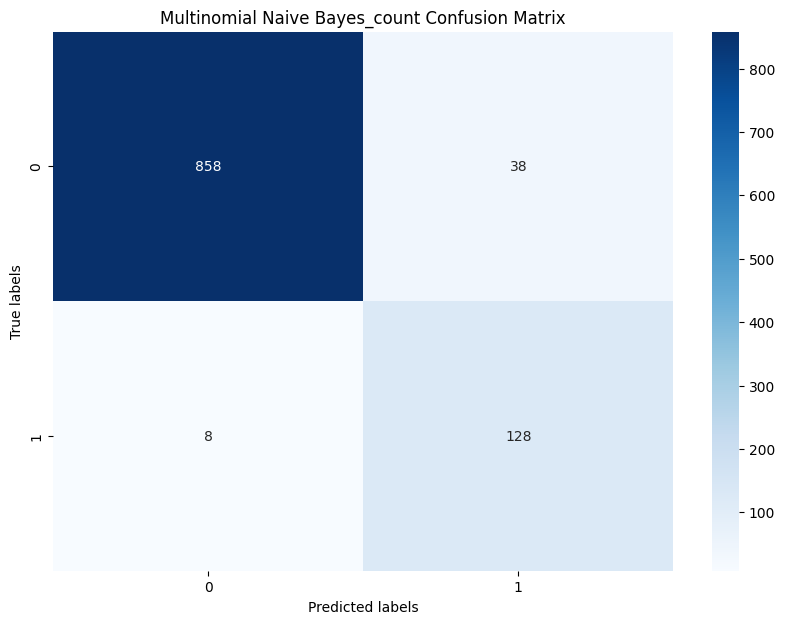

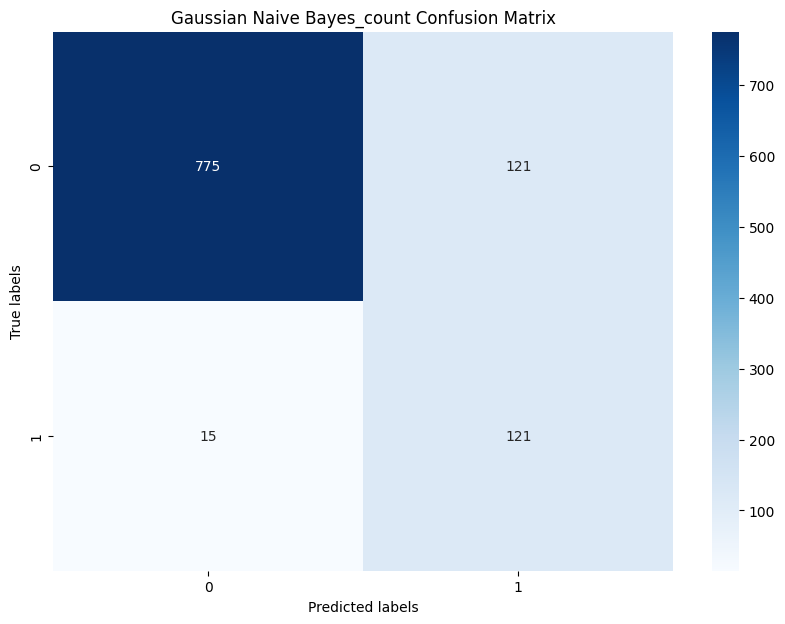

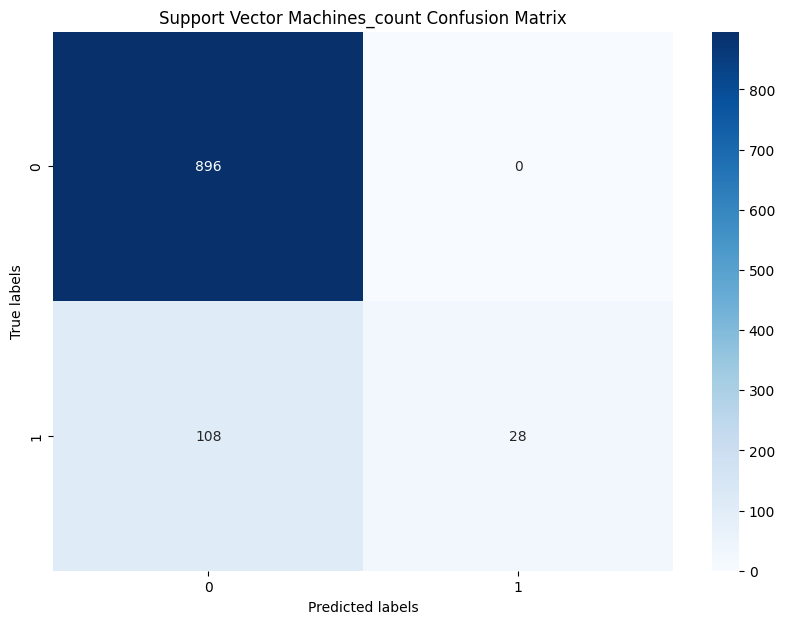

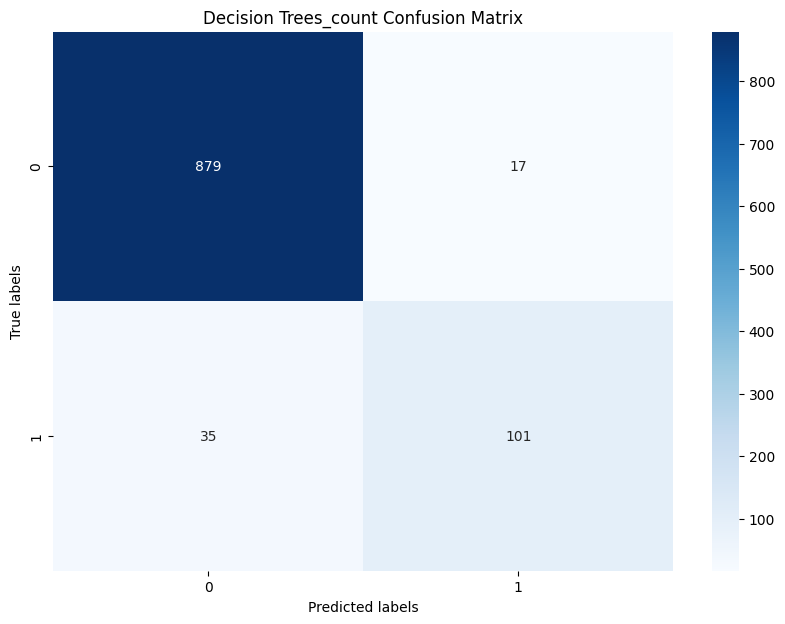

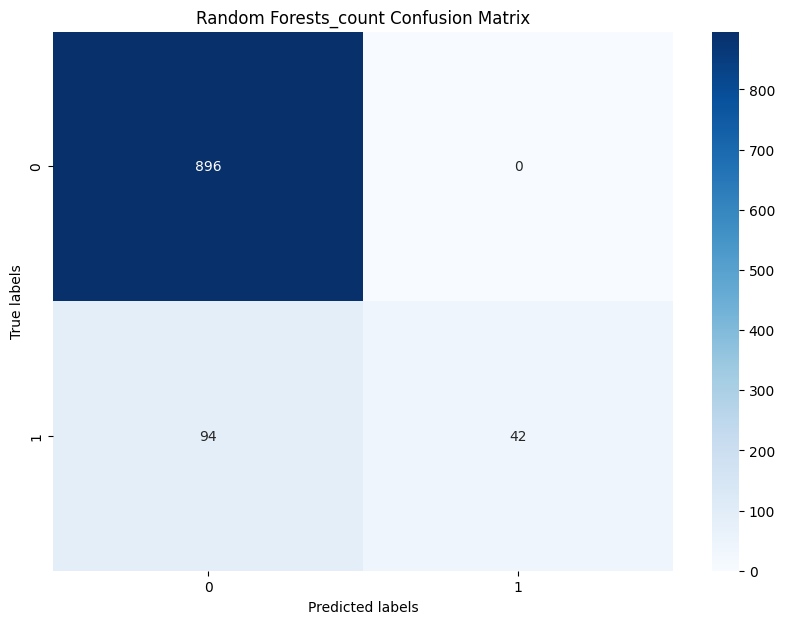

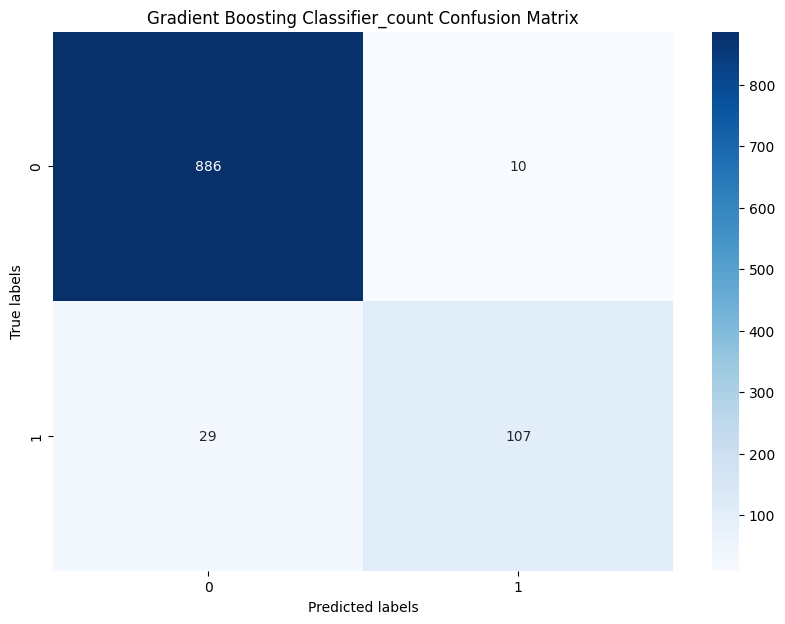

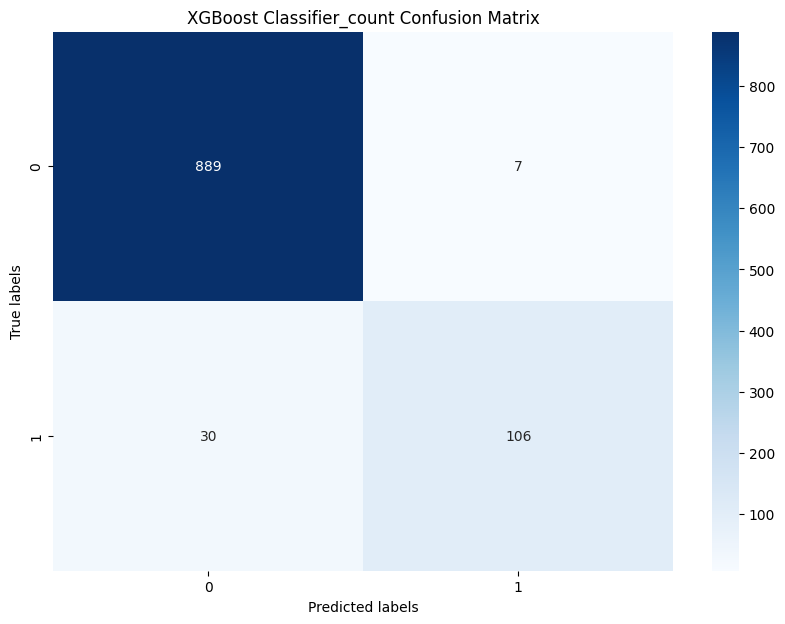

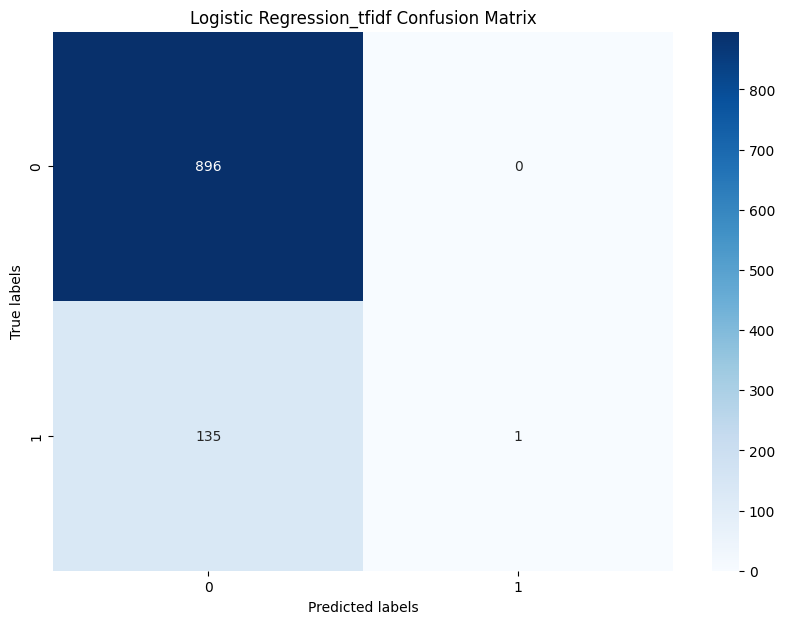

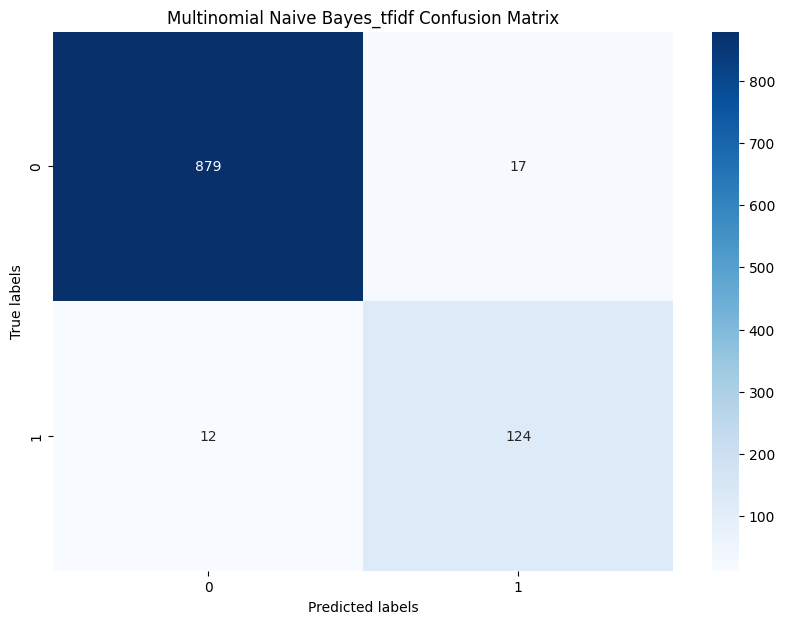

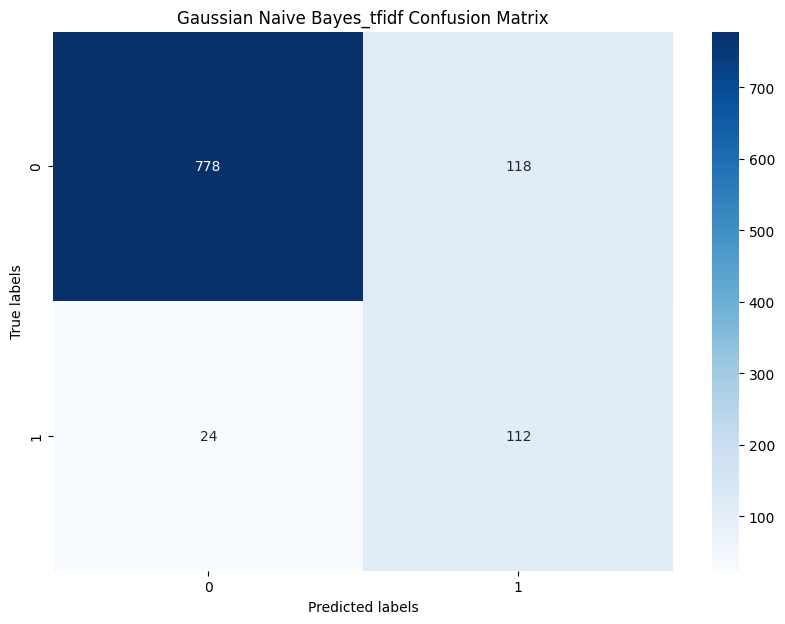

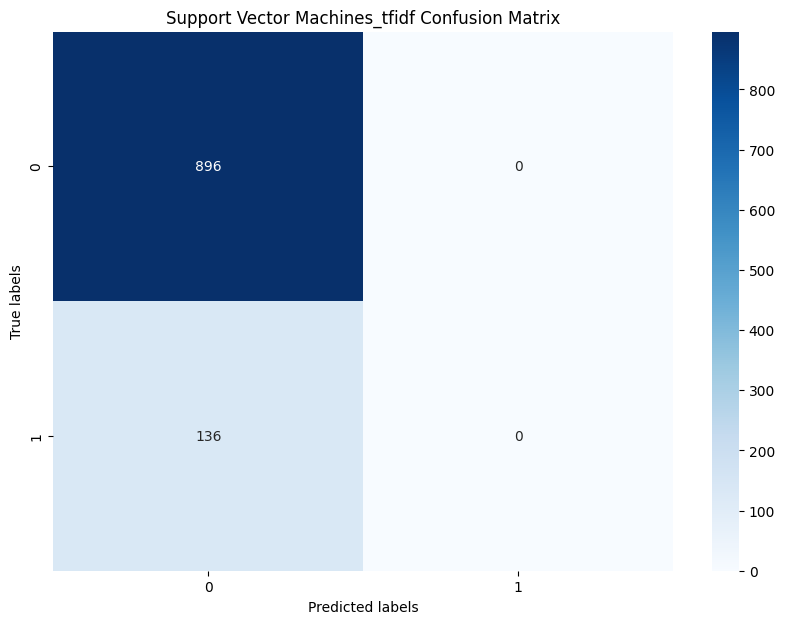

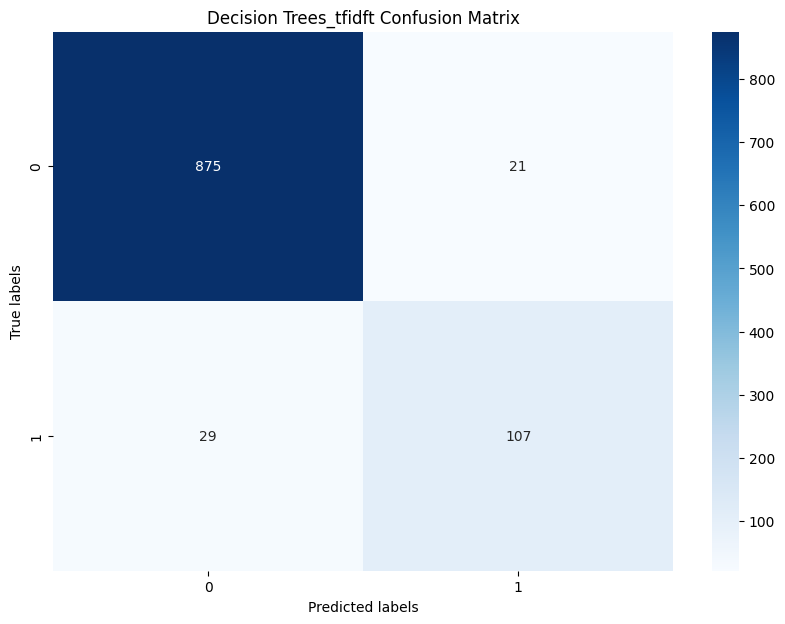

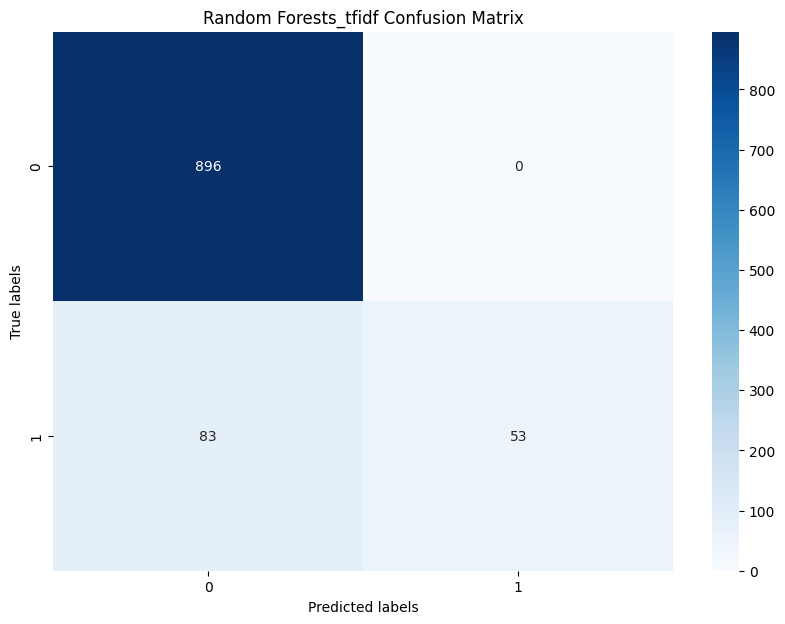

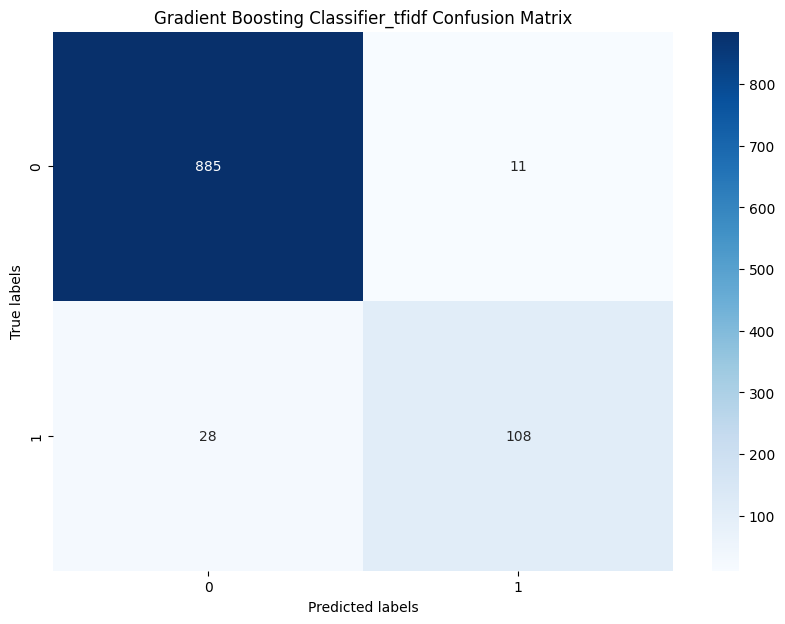

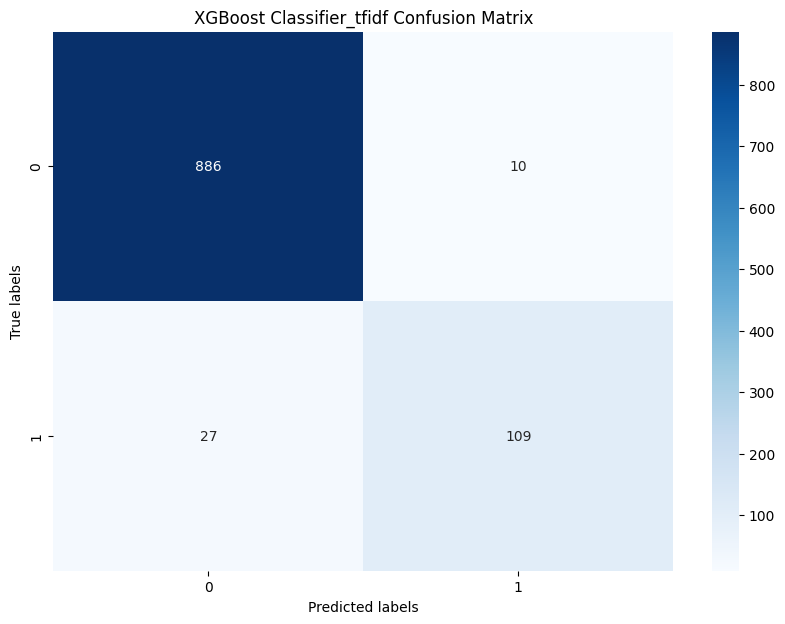

In [24]:
# Calculate accuracy, precision and recall for each model for CV
lr_accuracy_count = accuracy_score(y_test_count, lr_pred_count)
lr_precision_count = precision_score(y_test_count, lr_pred_count, average='weighted')
lr_recall_count = recall_score(y_test_count, lr_pred_count, average='weighted')
lr_conf_matrix_count = confusion_matrix(y_test_count, lr_pred_count)

# Calculate accuracy, precision and recall for each model for TFIDF
lr_accuracy_tfidf = accuracy_score(y_test_tfidf, lr_pred_tfidf)
lr_precision_tfidf = precision_score(y_test_tfidf, lr_pred_tfidf, average='weighted')
lr_recall_tfidf = recall_score(y_test_tfidf, lr_pred_tfidf, average='weighted')
lr_conf_matrix_tfidf = confusion_matrix(y_test_tfidf, lr_pred_tfidf)


mnb_accuracy_count = accuracy_score(y_test_count, mnb_pred_count)
mnb_precision_count = precision_score(y_test_count, mnb_pred_count, average='weighted')
mnb_recall_count = recall_score(y_test_count, mnb_pred_count, average='weighted')
mnb_conf_matrix_count = confusion_matrix(y_test_count, mnb_pred_count)

mnb_accuracy_tfidf = accuracy_score(y_test_tfidf, mnb_pred_tfidf)
mnb_precision_tfidf = precision_score(y_test_tfidf, mnb_pred_tfidf, average='weighted')
mnb_recall_tfidf = recall_score(y_test_tfidf, mnb_pred_tfidf, average='weighted')
mnb_conf_matrix_tfidf = confusion_matrix(y_test_tfidf, mnb_pred_tfidf)


gnb_accuracy_count = accuracy_score(y_test_count, gnb_pred_count)
gnb_precision_count = precision_score(y_test_count, gnb_pred_count, average='weighted')
gnb_recall_count = recall_score(y_test_count, gnb_pred_count, average='weighted')
gnb_conf_matrix_count = confusion_matrix(y_test_count, gnb_pred_count)

gnb_accuracy_tfidf = accuracy_score(y_test_tfidf, gnb_pred_tfidf)
gnb_precision_tfidf = precision_score(y_test_tfidf, gnb_pred_tfidf, average='weighted')
gnb_recall_tfidf = recall_score(y_test_tfidf, gnb_pred_tfidf, average='weighted')
gnb_conf_matrix_tfidf = confusion_matrix(y_test_tfidf, gnb_pred_tfidf)


svm_accuracy_count = accuracy_score(y_test_count, svm_pred_count)
svm_precision_count = precision_score(y_test_count, svm_pred_count, average='weighted')
svm_recall_count = recall_score(y_test_count, svm_pred_count, average='weighted')
svm_conf_matrix_count = confusion_matrix(y_test_count, svm_pred_count)

svm_accuracy_tfidf = accuracy_score(y_test_tfidf, svm_pred_tfidf)
svm_precision_tfidf = precision_score(y_test_tfidf, svm_pred_tfidf, average='weighted')
svm_recall_tfidf = recall_score(y_test_tfidf, svm_pred_tfidf, average='weighted')
svm_conf_matrix_tfidf = confusion_matrix(y_test_tfidf, svm_pred_tfidf)


dt_accuracy_count = accuracy_score(y_test_count, dt_pred_count)
dt_precision_count = precision_score(y_test_count, dt_pred_count, average='weighted')
dt_recall_count = recall_score(y_test_count, dt_pred_count, average='weighted')
dt_conf_matrix_count = confusion_matrix(y_test_count, dt_pred_count)

dt_accuracy_tfidf = accuracy_score(y_test_tfidf, dt_pred_tfidf)
dt_precision_tfidf = precision_score(y_test_tfidf, dt_pred_tfidf, average='weighted')
dt_recall_tfidf = recall_score(y_test_tfidf, dt_pred_tfidf, average='weighted')
dt_conf_matrix_tfidf = confusion_matrix(y_test_tfidf, dt_pred_tfidf)


rf_accuracy_count = accuracy_score(y_test_count, rf_pred_count)
rf_precision_count = precision_score(y_test_count, rf_pred_count, average='weighted')
rf_recall_count = recall_score(y_test_count, rf_pred_count, average='weighted')
rf_conf_matrix_count = confusion_matrix(y_test_count, rf_pred_count)

rf_accuracy_tfidf = accuracy_score(y_test_tfidf, rf_pred_tfidf)
rf_precision_tfidf = precision_score(y_test_tfidf, rf_pred_tfidf, average='weighted')
rf_recall_tfidf = recall_score(y_test_tfidf, rf_pred_tfidf, average='weighted')
rf_conf_matrix_tfidf = confusion_matrix(y_test_tfidf, rf_pred_tfidf)


gb_accuracy_count = accuracy_score(y_test_count, gb_pred_count)
gb_precision_count = precision_score(y_test_count, gb_pred_count, average='weighted')
gb_recall_count = recall_score(y_test_count, gb_pred_count, average='weighted')
gb_conf_matrix_count = confusion_matrix(y_test_count, gb_pred_count)

gb_accuracy_tfidf = accuracy_score(y_test_tfidf, gb_pred_tfidf)
gb_precision_tfidf = precision_score(y_test_tfidf, gb_pred_tfidf, average='weighted')
gb_recall_tfidf = recall_score(y_test_tfidf, gb_pred_tfidf, average='weighted')
gb_conf_matrix_tfidf = confusion_matrix(y_test_tfidf, gb_pred_tfidf)


xgb_accuracy_count = accuracy_score(y_test_count, xgb_pred_count)
xgb_precision_count = precision_score(y_test_count, xgb_pred_count, average='weighted')
xgb_recall_count = recall_score(y_test_count, xgb_pred_count, average='weighted')
xgb_conf_matrix_count = confusion_matrix(y_test_count, xgb_pred_count)

xgb_accuracy_tfidf = accuracy_score(y_test_tfidf, xgb_pred_tfidf)
xgb_precision_tfidf = precision_score(y_test_tfidf, xgb_pred_tfidf, average='weighted')
xgb_recall_tfidf = recall_score(y_test_tfidf, xgb_pred_tfidf, average='weighted')
xgb_conf_matrix_tfidf = confusion_matrix(y_test_tfidf, xgb_pred_tfidf)


#draw confusion matrix
def draw_confusion_matrix(
  accuracy, precision, recall, confusion_matrix, model_name):
  plt.figure(figsize=(10, 7))
  plt.title(f'{model_name} Confusion Matrix')
  sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.show()
# Draw confusion matrix for each Count Vectorizer model
draw_confusion_matrix(lr_accuracy_count, lr_precision_count, lr_recall_count, lr_conf_matrix_count, 'Logistic Regression_count')
draw_confusion_matrix(mnb_accuracy_count, mnb_precision_count, mnb_recall_count, mnb_conf_matrix_count, 'Multinomial Naive Bayes_count')
draw_confusion_matrix(gnb_accuracy_count, gnb_precision_count, gnb_recall_count, gnb_conf_matrix_count, 'Gaussian Naive Bayes_count')
draw_confusion_matrix(svm_accuracy_count, svm_precision_count, svm_recall_count, svm_conf_matrix_count, 'Support Vector Machines_count')
draw_confusion_matrix(dt_accuracy_count, dt_precision_count, dt_recall_count, dt_conf_matrix_count, 'Decision Trees_count')
draw_confusion_matrix(rf_accuracy_count, rf_precision_count, rf_recall_count, rf_conf_matrix_count, 'Random Forests_count')
draw_confusion_matrix(gb_accuracy_count, gb_precision_count, gb_recall_count, gb_conf_matrix_count, 'Gradient Boosting Classifier_count')
draw_confusion_matrix(xgb_accuracy_count, xgb_precision_count, xgb_recall_count, xgb_conf_matrix_count, 'XGBoost Classifier_count')

# Draw confusion matrix for each TFIDF Vectorizer model
draw_confusion_matrix(lr_accuracy_tfidf, lr_precision_tfidf, lr_recall_tfidf, lr_conf_matrix_tfidf, 'Logistic Regression_tfidf')
draw_confusion_matrix(mnb_accuracy_tfidf, mnb_precision_tfidf, mnb_recall_tfidf, mnb_conf_matrix_tfidf, 'Multinomial Naive Bayes_tfidf')
draw_confusion_matrix(gnb_accuracy_tfidf, gnb_precision_tfidf, gnb_recall_tfidf, gnb_conf_matrix_tfidf, 'Gaussian Naive Bayes_tfidf')
draw_confusion_matrix(svm_accuracy_tfidf, svm_precision_tfidf, svm_recall_tfidf, svm_conf_matrix_tfidf, 'Support Vector Machines_tfidf')
draw_confusion_matrix(dt_accuracy_tfidf, dt_precision_tfidf, dt_recall_tfidf, dt_conf_matrix_tfidf, 'Decision Trees_tfidft')
draw_confusion_matrix(rf_accuracy_tfidf, rf_precision_tfidf, rf_recall_tfidf, rf_conf_matrix_tfidf, 'Random Forests_tfidf')
draw_confusion_matrix(gb_accuracy_tfidf, gb_precision_tfidf, gb_recall_tfidf, gb_conf_matrix_tfidf, 'Gradient Boosting Classifier_tfidf')
draw_confusion_matrix(xgb_accuracy_tfidf, xgb_precision_tfidf, xgb_recall_tfidf, xgb_conf_matrix_tfidf, 'XGBoost Classifier_tfidf')


In [25]:
# Print precision, recall, and accuracy for each model for both Count vectorizer and TFIDF Vectorizer
print("Logistic Regression_count:")
print(f"The accuracy score of Logistic Regression is {lr_accuracy_count}, The Precision Score is {lr_precision_count},The Recall Score is {lr_recall_count}")
print(f"The Confusion matrix is \n{lr_conf_matrix_count}")
print("\n")

print("Logistic Regression_tfidf:")
print(f"The accuracy score of Logistic Regression is {lr_accuracy_tfidf}, The Precision Score is {lr_precision_tfidf},The Recall Score is {lr_recall_tfidf}")
print(f"The Confusion matrix is \n{lr_conf_matrix_tfidf}")
print("\n")


print("Multinomial Naive Bayes_count:")
print(f"The accuracy score of MultinomialNB is {mnb_accuracy_count}, The Precision Score is {mnb_precision_count},The Recall Score is {mnb_recall_count}")
print(f"The Confusion matrix is \n{mnb_conf_matrix_count}")
print("\n")

print("Multinomial Naive Bayes_tfidf:")
print(f"The accuracy score of MultinomialNB is {mnb_accuracy_tfidf}, The Precision Score is {mnb_precision_tfidf},The Recall Score is {mnb_recall_tfidf}")
print(f"The Confusion matrix is \n{mnb_conf_matrix_tfidf}")
print("\n")


print("Gaussian Naive Bayes_count:")
print(f"The accuracy score of GaussianNB is {gnb_accuracy_count}, The Precision Score is {gnb_precision_count},The Recall Score is {gnb_recall_count}")
print(f"The Confusion matrix is \n{gnb_conf_matrix_count}")
print("\n")

print("Gaussian Naive Bayes_tfidf:")
print(f"The accuracy score of GaussianNB is {gnb_accuracy_tfidf}, The Precision Score is {gnb_precision_tfidf},The Recall Score is {gnb_recall_tfidf}")
print(f"The Confusion matrix is \n{gnb_conf_matrix_tfidf}")
print("\n")


print("SVM_count:")
print(f"The accuracy score of SVC is {svm_accuracy_count}, The Precision Score is {svm_precision_count},The Recall Score is {svm_recall_count}")
print(f"The Confusion matrix is \n{svm_conf_matrix_count}")
print("\n")

print("SVM_tfidf:")
print(f"The accuracy score of SVC is {svm_accuracy_tfidf}, The Precision Score is {svm_precision_tfidf},The Recall Score is {svm_recall_tfidf}")
print(f"The Confusion matrix is \n{svm_conf_matrix_tfidf}")
print("\n")


print("Decision Trees_count:")
print(f"The accuracy score of Decision Tree classifier is {dt_accuracy_count}, The Precision Score is {dt_precision_count},The Recall Score is {dt_recall_count}")
print(f"The Confusion matrix is \n{dt_conf_matrix_count}")
print("\n")

print("Decision Trees_tfidf:")
print(f"The accuracy score of Decision Tree classifier is {dt_accuracy_tfidf}, The Precision Score is {dt_precision_tfidf},The Recall Score is {dt_recall_tfidf}")
print(f"The Confusion matrix is \n{dt_conf_matrix_tfidf}")
print("\n")


print("Random Forests_count:")
print(f"The accuracy score of Random Forest classifier is {rf_accuracy_count}, The Precision Score is {rf_precision_count},The Recall Score is {rf_recall_count}")
print(f"The Confusion matrix is \n{rf_conf_matrix_count}")
print("\n")

print("Random Forests_tfidf:")
print(f"The accuracy score of Random Forest classifier is {rf_accuracy_tfidf}, The Precision Score is {rf_precision_tfidf},The Recall Score is {rf_recall_tfidf}")
print(f"The Confusion matrix is \n{rf_conf_matrix_tfidf}")
print("\n")


print("Gradient Boosting Classifier_count:")
print(f"The accuracy score of Gradient Boosting Classifier is {gb_accuracy_count}, The Precision Score is {gb_precision_count},The Recall Score is {gb_recall_count}")
print(f"The Confusion matrix is \n{gb_conf_matrix_count}")
print("\n")

print("Gradient Boosting Classifier_tfidf:")
print(f"The accuracy score of Gradient Boosting Classifier is {gb_accuracy_tfidf}, The Precision Score is {gb_precision_tfidf},The Recall Score is {gb_recall_tfidf}")
print(f"The Confusion matrix is \n{gb_conf_matrix_tfidf}")
print("\n")


print("XGBoost Classifier_count:")
print(f"The accuracy score of XGBoost Classifier is {xgb_accuracy_count}, The Precision Score is {xgb_precision_count},The Recall Score is {xgb_recall_count}")
print(f"The Confusion matrix is \n{xgb_conf_matrix_count}")
print("\n")

print("XGBoost Classifier_tfidf:")
print(f"The accuracy score of XGBoost Classifier is {xgb_accuracy_tfidf}, The Precision Score is {xgb_precision_tfidf},The Recall Score is {xgb_recall_tfidf}")
print(f"The Confusion matrix is \n{xgb_conf_matrix_tfidf}")
print("\n")


Logistic Regression_count:
The accuracy score of Logistic Regression is 0.9699612403100775, The Precision Score is 0.9706099927356175,The Recall Score is 0.9699612403100775
The Confusion matrix is 
[[895   1]
 [ 30 106]]


Logistic Regression_tfidf:
The accuracy score of Logistic Regression is 0.8691860465116279, The Precision Score is 0.8863149346987571,The Recall Score is 0.8691860465116279
The Confusion matrix is 
[[896   0]
 [135   1]]


Multinomial Naive Bayes_count:
The accuracy score of MultinomialNB is 0.9554263565891473, The Precision Score is 0.9618123387799008,The Recall Score is 0.9554263565891473
The Confusion matrix is 
[[858  38]
 [  8 128]]


Multinomial Naive Bayes_tfidf:
The accuracy score of MultinomialNB is 0.9718992248062015, The Precision Score is 0.9724181170659811,The Recall Score is 0.9718992248062015
The Confusion matrix is 
[[879  17]
 [ 12 124]]


Gaussian Naive Bayes_count:
The accuracy score of GaussianNB is 0.8682170542635659, The Precision Score is 0.917

In [28]:
# Create a dictionary with evaluation results for Count Vectorizer
evaluation_data_count = {
    'Model': ['Logistic Regression_count', 'MultinomialNB_count', 'GaussianNB_count', 'Decision Tree_count', 'SVM_count', 'Random Forest_count',
              'Gradient Boosting_count', 'XGBoost_count'],
    'Accuracy': [lr_accuracy_count, mnb_accuracy_count, gnb_accuracy_count, dt_accuracy_count, svm_accuracy_count, rf_accuracy_count,
                 gb_accuracy_count, xgb_accuracy_count],
    'Precision': [lr_precision_count, mnb_precision_count, gnb_precision_count, dt_precision_count, svm_precision_count, rf_precision_count,
                  gb_precision_count, xgb_precision_count],
    'Recall': [lr_recall_count, mnb_recall_count, gnb_recall_count, dt_recall_count, svm_recall_count, rf_recall_count,
               gb_recall_count, xgb_recall_count]
   }

# Create a DataFrame
evaluation_df = pd.DataFrame(evaluation_data_count)

# Sort the DataFrame based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision', 'Recall'], ascending=False)

# Display the sorted DataFrame
print(evaluation_df)



# Create a dictionary with evaluation results for TFIDF Vectorizer
evaluation_data_tfidf = {
    'Model': ['Logistic Regression_tfidf', 'MultinomialNB_tfidf', 'GaussianNB_tfidf', 'Decision Tree_tfidf', 'SVM_tfidf', 'Random Forest_tfidf',
              'Gradient Boosting_tfidf', 'XGBoost_tfidf'],
    'Accuracy': [lr_accuracy_tfidf, mnb_accuracy_tfidf, gnb_accuracy_tfidf, dt_accuracy_tfidf, svm_accuracy_tfidf, rf_accuracy_tfidf,
                 gb_accuracy_tfidf, xgb_accuracy_tfidf],
    'Precision': [lr_precision_tfidf, mnb_precision_tfidf, gnb_precision_tfidf, dt_precision_tfidf, svm_precision_tfidf, rf_precision_tfidf,
                  gb_precision_tfidf, xgb_precision_tfidf],
    'Recall': [lr_recall_tfidf, mnb_recall_tfidf, gnb_recall_tfidf, dt_recall_tfidf, svm_recall_tfidf, rf_recall_tfidf,
               gb_recall_tfidf, xgb_recall_tfidf]
   }

# Create a DataFrame
evaluation_df = pd.DataFrame(evaluation_data_tfidf)

# Sort the DataFrame based on Accuracy and Precision columns in descending order
evaluation_df = evaluation_df.sort_values(by=['Accuracy', 'Precision', 'Recall'], ascending=False)

# Display the sorted DataFrame
print(evaluation_df)




                       Model  Accuracy  Precision    Recall
0  Logistic Regression_count  0.969961   0.970610  0.969961
7              XGBoost_count  0.964147   0.963494  0.964147
6    Gradient Boosting_count  0.962209   0.961219  0.962209
1        MultinomialNB_count  0.955426   0.961812  0.955426
3        Decision Tree_count  0.949612   0.947767  0.949612
5        Random Forest_count  0.908915   0.917563  0.908915
4                  SVM_count  0.895349   0.906606  0.895349
2           GaussianNB_count  0.868217   0.917623  0.868217
                       Model  Accuracy  Precision    Recall
1        MultinomialNB_tfidf  0.971899   0.972418  0.971899
7              XGBoost_tfidf  0.964147   0.963250  0.964147
6    Gradient Boosting_tfidf  0.962209   0.961192  0.962209
3        Decision Tree_tfidf  0.951550   0.950527  0.951550
5        Random Forest_tfidf  0.919574   0.926392  0.919574
0  Logistic Regression_tfidf  0.869186   0.886315  0.869186
4                  SVM_tfidf  0.868217  

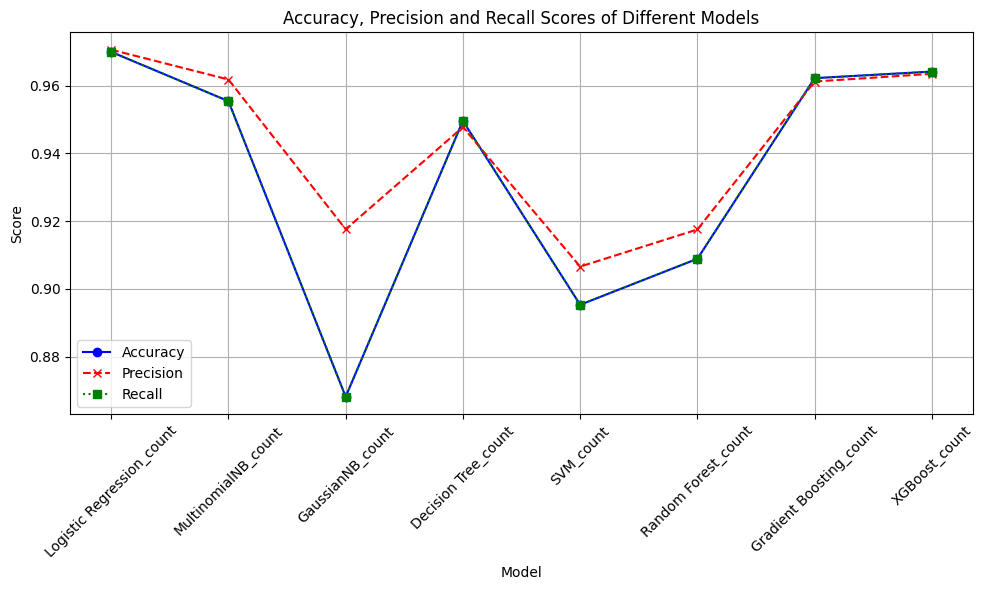

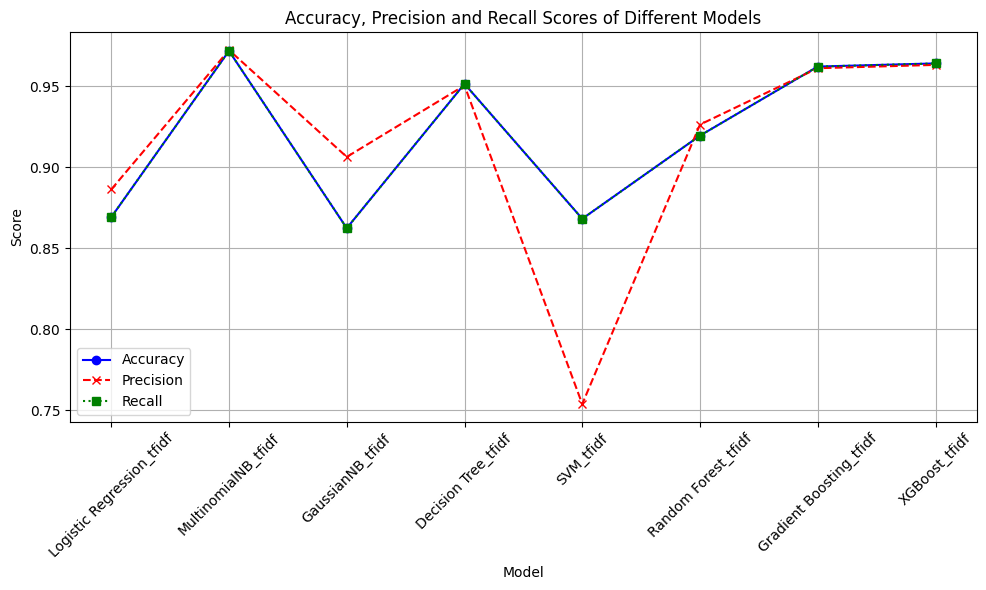

In [29]:
# Define the models and their corresponding accuracy and precision scores
Models = ['Logistic Regression_count', 'MultinomialNB_count', 'GaussianNB_count', 'Decision Tree_count', 'SVM_count', 'Random Forest_count',
          'Gradient Boosting_count', 'XGBoost_count']
Accuracy = [lr_accuracy_count, mnb_accuracy_count, gnb_accuracy_count, dt_accuracy_count, svm_accuracy_count, rf_accuracy_count,
            gb_accuracy_count, xgb_accuracy_count]
Precision = [lr_precision_count, mnb_precision_count, gnb_precision_count, dt_precision_count, svm_precision_count, rf_precision_count,
             gb_precision_count, xgb_precision_count]
Recall = [lr_recall_count, mnb_recall_count, gnb_recall_count, dt_recall_count, svm_recall_count, rf_recall_count,
          gb_recall_count, xgb_recall_count]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(Models, Accuracy, marker='o', linestyle='-', color='b', label='Accuracy')

# Plot precision scores
plt.plot(Models, Precision, marker='x', linestyle='--', color='r', label='Precision')

# Plot Recall scores
plt.plot(Models, Recall, marker='s', linestyle=':', color='g', label='Recall')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy, Precision and Recall Scores of Different Models')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()




# Define the models and their corresponding accuracy and precision scores
Models = ['Logistic Regression_tfidf', 'MultinomialNB_tfidf', 'GaussianNB_tfidf', 'Decision Tree_tfidf', 'SVM_tfidf', 'Random Forest_tfidf',
          'Gradient Boosting_tfidf', 'XGBoost_tfidf']
Accuracy = [lr_accuracy_tfidf, mnb_accuracy_tfidf, gnb_accuracy_tfidf, dt_accuracy_tfidf, svm_accuracy_tfidf, rf_accuracy_tfidf,
            gb_accuracy_tfidf, xgb_accuracy_tfidf]
Precision = [lr_precision_tfidf, mnb_precision_tfidf, gnb_precision_tfidf, dt_precision_tfidf, svm_precision_tfidf, rf_precision_tfidf,
             gb_precision_tfidf, xgb_precision_tfidf]
Recall = [lr_recall_tfidf, mnb_recall_tfidf, gnb_recall_tfidf, dt_recall_tfidf, svm_recall_tfidf, rf_recall_tfidf,
          gb_recall_tfidf, xgb_recall_tfidf]

# Plotting
plt.figure(figsize=(10, 6))

# Plot accuracy scores
plt.plot(Models, Accuracy, marker='o', linestyle='-', color='b', label='Accuracy')

# Plot precision scores
plt.plot(Models, Precision, marker='x', linestyle='--', color='r', label='Precision')

# Plot Recall scores
plt.plot(Models, Recall, marker='s', linestyle=':', color='g', label='Recall')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Accuracy, Precision and Recall Scores of Different Models')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
# Example new email message
new_email = "YOUR CHANCE TO BE ON A REALITY FANTASY SHOW call now = 08707509020 Just 20p per min NTT Ltd, PO Box 1327 Croydon CR9 5WB 0870 is a national = rate call."

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer and TFIDF
new_email_vector_count = count_vectorizer.transform([new_email_cleaned]).toarray()
new_email_vector_tfidf = tfidf_vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model we want to use for prediction (e.g., Logistic Regression)
model_to_use_count = lr_model  # Logistic Regression model trained earlier
model_to_use_tfidf = lr_model

# Make the prediction
prediction_count = model_to_use_count.predict(new_email_vector_count)
prediction_tfidf = model_to_use_tfidf.predict(new_email_vector_tfidf)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label_count = le.inverse_transform(prediction_count)[0]
predicted_label_tfidf = le.inverse_transform(prediction_tfidf)[0]

# Print the result
print(f"The email with cv is classified as: {predicted_label_count}")
print(f"The email with tfidf is classified as: {predicted_label_tfidf}")



The email with cv is classified as: spam
The email with tfidf is classified as: ham


In [33]:
# Example new email message
new_email = "Even my brother is not like to speak with me. They treat me like aids patent."

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer and TFIDF
new_email_vector_count = count_vectorizer.transform([new_email_cleaned]).toarray()
new_email_vector_tfidf = tfidf_vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model we want to use for prediction (e.g., MultinomialNB)
model_to_use_count = mnb_model  # MultinomialNB model trained earlier
model_to_use_tfidf = mnb_model

# Make the prediction
prediction_count = model_to_use_count.predict(new_email_vector_count)
prediction_tfidf = model_to_use_tfidf.predict(new_email_vector_tfidf)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label_count = le.inverse_transform(prediction_count)[0]
predicted_label_tfidf = le.inverse_transform(prediction_tfidf)[0]

# Print the result
print(f"The email with cv is classified as: {predicted_label_count}")
print(f"The email with tfidf is classified as: {predicted_label_tfidf}")

The email with cv is classified as: ham
The email with tfidf is classified as: ham


In [34]:
# Example new email message
new_email = "07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer and TFIDF
new_email_vector_count = count_vectorizer.transform([new_email_cleaned]).toarray()
new_email_vector_tfidf = tfidf_vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model we want to use for prediction (e.g., GradientNB)
model_to_use_count = gnb_model  # GradientNB model trained earlier
model_to_use_tfidf = gnb_model

# Make the prediction
prediction_count = model_to_use_count.predict(new_email_vector_count)
prediction_tfidf = model_to_use_tfidf.predict(new_email_vector_tfidf)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label_count = le.inverse_transform(prediction_count)[0]
predicted_label_tfidf = le.inverse_transform(prediction_tfidf)[0]

# Print the result
print(f"The email with cv is classified as: {predicted_label_count}")
print(f"The email with tfidf is classified as: {predicted_label_tfidf}")

The email with cv is classified as: spam
The email with tfidf is classified as: spam


In [36]:
# Example new email message
new_email = "Yeah hopefully, if tyler can't do it I could maybe ask around a bit"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer and TFIDF
new_email_vector_count = count_vectorizer.transform([new_email_cleaned]).toarray()
new_email_vector_tfidf = tfidf_vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model we want to use for prediction (e.g., Decision Tree)
model_to_use_count = dt_model  # Decision Tree model trained earlier
model_to_use_tfidf = dt_model

# Make the prediction
prediction_count = model_to_use_count.predict(new_email_vector_count)
prediction_tfidf = model_to_use_tfidf.predict(new_email_vector_tfidf)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label_count = le.inverse_transform(prediction_count)[0]
predicted_label_tfidf = le.inverse_transform(prediction_tfidf)[0]

# Print the result
print(f"The email with cv is classified as: {predicted_label_count}")
print(f"The email with tfidf is classified as: {predicted_label_tfidf}")

The email with cv is classified as: ham
The email with tfidf is classified as: ham


In [37]:
# Example new email message
new_email = "Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer and TFIDF
new_email_vector_count = count_vectorizer.transform([new_email_cleaned]).toarray()
new_email_vector_tfidf = tfidf_vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model we want to use for prediction (e.g., SVM)
model_to_use_count = svm_model  # SVM model trained earlier
model_to_use_tfidf = svm_model

# Make the prediction
prediction_count = model_to_use_count.predict(new_email_vector_count)
prediction_tfidf = model_to_use_tfidf.predict(new_email_vector_tfidf)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label_count = le.inverse_transform(prediction_count)[0]
predicted_label_tfidf = le.inverse_transform(prediction_tfidf)[0]

# Print the result
print(f"The email with cv is classified as: {predicted_label_count}")
print(f"The email with tfidf is classified as: {predicted_label_tfidf}")

The email with cv is classified as: ham
The email with tfidf is classified as: ham


In [38]:
# Example new email message
new_email = "Too late. I said i have the website. I didn't i have or dont have the slippers"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer and TFIDF
new_email_vector_count = count_vectorizer.transform([new_email_cleaned]).toarray()
new_email_vector_tfidf = tfidf_vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model we want to use for prediction (e.g., Random Forest)
model_to_use_count = rf_model  # Random Forest model trained earlier
model_to_use_tfidf = rf_model

# Make the prediction
prediction_count = model_to_use_count.predict(new_email_vector_count)
prediction_tfidf = model_to_use_tfidf.predict(new_email_vector_tfidf)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label_count = le.inverse_transform(prediction_count)[0]
predicted_label_tfidf = le.inverse_transform(prediction_tfidf)[0]

# Print the result
print(f"The email with cv is classified as: {predicted_label_count}")
print(f"The email with tfidf is classified as: {predicted_label_tfidf}")

The email with cv is classified as: ham
The email with tfidf is classified as: ham


In [40]:
# Example new email message
new_email = "PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08715203694 Identifier Code: 40533 Expires 31/10/04"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer and TFIDF
new_email_vector_count = count_vectorizer.transform([new_email_cleaned]).toarray()
new_email_vector_tfidf = tfidf_vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model we want to use for prediction (e.g., Gradient Boost)
model_to_use_count = gb_model  # Gradient Boost model trained earlier
model_to_use_tfidf = gb_model

# Make the prediction
prediction_count = model_to_use_count.predict(new_email_vector_count)
prediction_tfidf = model_to_use_tfidf.predict(new_email_vector_tfidf)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label_count = le.inverse_transform(prediction_count)[0]
predicted_label_tfidf = le.inverse_transform(prediction_tfidf)[0]

# Print the result
print(f"The email with cv is classified as: {predicted_label_count}")
print(f"The email with tfidf is classified as: {predicted_label_tfidf}")

The email with cv is classified as: ham
The email with tfidf is classified as: spam


In [41]:
# Example new email message
new_email = "Have you had a good day? Mine was really busy are you up to much tomorrow night?"

# Preprocess the new email
new_email_cleaned = remove_html_tags(new_email)  # Remove HTML tags
new_email_cleaned = remove_urls(new_email_cleaned)  # Remove URLs
new_email_cleaned = remove_punctuation(new_email_cleaned)  # Remove punctuation
new_email_cleaned = remove_special_characters(new_email_cleaned)  # Remove special characters
new_email_cleaned = remove_numeric(new_email_cleaned)  # Remove numbers
new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)  # Remove non-alphanumeric characters
new_email_cleaned = replace_chat_words(new_email_cleaned)  # Replace chat words
new_email_cleaned = remove_stopwords(new_email_cleaned)  # Remove stopwords
new_email_cleaned = remove_emojis(new_email_cleaned)  # Remove emojis
new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])  # Stemming

# Transform the cleaned email text into a feature vector using the fitted CountVectorizer and TFIDF
new_email_vector_count = count_vectorizer.transform([new_email_cleaned]).toarray()
new_email_vector_tfidf = tfidf_vectorizer.transform([new_email_cleaned]).toarray()

# Choose the model we want to use for prediction (e.g., XGBoost)
model_to_use_count = xgb_model  # XGBoost model trained earlier
model_to_use_tfidf = xgb_model

# Make the prediction
prediction_count = model_to_use_count.predict(new_email_vector_count)
prediction_tfidf = model_to_use_tfidf.predict(new_email_vector_tfidf)

# Decode the predicted label (0 or 1) back to 'spam' or 'ham'
predicted_label_count = le.inverse_transform(prediction_count)[0]
predicted_label_tfidf = le.inverse_transform(prediction_tfidf)[0]

# Print the result
print(f"The email with cv is classified as: {predicted_label_count}")
print(f"The email with tfidf is classified as: {predicted_label_tfidf}")

The email with cv is classified as: ham
The email with tfidf is classified as: ham


In [70]:
def ai_agent(new_email, model, vectorizer, label_encoder):
    """
    Classifies whether a given email is spam or ham using the provided model and vectorizer.

    Args:
    - new_email (str): The email text to classify.
    - model: Trained model (e.g., Logistic Regression, Naive Bayes, etc.)
    - vectorizer: Fitted CountVectorizer or TfidfVectorizer
    - label_encoder: Fitted LabelEncoder

    Returns:
    - str: The classification result ('spam' or 'ham')
    """
    # Preprocess the email
    new_email_cleaned = remove_html_tags(new_email)
    new_email_cleaned = remove_urls(new_email_cleaned)
    new_email_cleaned = remove_punctuation(new_email_cleaned)
    new_email_cleaned = remove_special_characters(new_email_cleaned)
    new_email_cleaned = remove_numeric(new_email_cleaned)
    new_email_cleaned = remove_non_alphanumeric(new_email_cleaned)
    new_email_cleaned = replace_chat_words(new_email_cleaned)
    new_email_cleaned = remove_stopwords(new_email_cleaned)
    new_email_cleaned = remove_emojis(new_email_cleaned)
    new_email_cleaned = ' '.join([porter_stemmer.stem(word) for word in new_email_cleaned.split()])

    # Vectorize using the provided vectorizer
    new_email_vector = vectorizer.transform([new_email_cleaned]).toarray()

    # Predict using the provided model
    prediction = model.predict(new_email_vector)

    # Decode label
    predicted_label = label_encoder.inverse_transform(prediction)[0]

    return predicted_label

new_emails = [
    "Too late. I said i have the website. I didn't i have or dont have the slippers",
    "PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08715203694 Identifier Code: 40533 Expires 31/10/04",
    "Yeah hopefully, if tyler can't do it I could maybe ask around a bit",
    "Even my brother is not like to speak with me. They treat me like aids patent.",
    "You have WON a guaranteed £1000 cash or a £2000 prize. To claim yr prize call our customer service representative on 08714712394 between 10am-7pm",
    "Urgent Ur Â£500 guaranteed award is still unclaimed! Call 09066368327 NOW closingdate04/09/02 claimcode M39M51 Â£1.50pmmorefrommobile2Bremoved-MobyPOBox734LS27YF",
    "Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16",
    "5 Free Top Polyphonic Tones call 087018728737, National Rate. Get a toppoly tune sent every week, just text SUBPOLY to 81618, Â£3 per pole. UnSub 08718727870.",
    "Congratulations! Thanks to a good friend U have WON the Â£2,000 Xmas prize. 2 claim is easy, just call 08718726971 NOW! Only 10p per minute. BT-national-rate."
    ]

for email in new_emails:
    result_count = ai_agent(email, dt_model, count_vectorizer, le)
    result_tfidf = ai_agent(email, dt_model, tfidf_vectorizer, le)

    print(f"Email using CountVectorizer: {result_count}")
    print(f"Email using TFIDF: {result_tfidf}")


Email using CountVectorizer: ham
Email using TFIDF: ham
Email using CountVectorizer: ham
Email using TFIDF: spam
Email using CountVectorizer: ham
Email using TFIDF: ham
Email using CountVectorizer: ham
Email using TFIDF: ham
Email using CountVectorizer: spam
Email using TFIDF: spam
Email using CountVectorizer: ham
Email using TFIDF: spam
Email using CountVectorizer: spam
Email using TFIDF: spam
Email using CountVectorizer: spam
Email using TFIDF: spam
Email using CountVectorizer: spam
Email using TFIDF: spam


In [86]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Sample Data (Replace with your real dataset)
texts = df['Message']  # Assuming your email text column is 'text'
labels = df['Category']  # Assuming labels are in 'Category' ('spam' or 'ham')

# 2. Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# 3. Tokenize the text
max_words = 5000  # Use top 5000 words
max_len = 200     # Max sequence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=max_len)

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Build LSTM Model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 6. Train the model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 7. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# 8. Make a prediction
new_email = "Even my brother is not like to speak with me. They treat me like aids patent."
new_seq = tokenizer.texts_to_sequences([new_email])
new_padded = pad_sequences(new_seq, maxlen=max_len)
prediction = model.predict(new_padded)

predicted_label = label_encoder.inverse_transform([int(prediction[0] > 0.5)])[0]
print(f"Predicted Label: {predicted_label}")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 34s 232ms/step - accuracy: 0.8571 - loss: 0.3760 - val_accuracy: 0.9734 - val_loss: 0.1074
Epoch 2/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 26s 224ms/step - accuracy: 0.9797 - loss: 0.0844 - val_accuracy: 0.9806 - val_loss: 0.0591
Epoch 3/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 41s 226ms/step - accuracy: 0.9943 - loss: 0.0260 - val_accuracy: 0.9831 - val_loss: 0.0613
Epoch 4/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 48s 289ms/step - accuracy: 0.9955 - loss: 0.0186 - val_accuracy: 0.9855 - val_loss: 0.0615
Epoch 5/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 34s 227ms/step - accuracy: 0.9973 - loss: 0.0113 - val_accuracy: 0.9855 - val_loss: 0.0711
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9802 - loss: 0.0738
Test Accuracy: 0.9806
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step
Predicted Label: 0


1. prediction[0]
This gets the predicted probability from the model output.

For example, prediction = [0.84] means the model is 84% confident the email is spam.

2. prediction[0] > 0.5
This checks if the model's prediction is greater than 0.5.

If yes → consider it as class 1 (e.g., spam).

If no → class 0 (e.g., ham).

3. int(prediction[0] > 0.5)
Converts the boolean result (True or False) into integer:

True → 1

False → 0

4. [int(...)]
Wraps it in a list because LabelEncoder.inverse_transform() expects an array-like input.

5. label_encoder.inverse_transform(...)
This takes the class 0 or 1 and maps it back to the original label:

0 → ham

1 → spam

6. [0] at the end
Extracts the single value from the list (because inverse_transform returns an array).

In [91]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Sample Data
texts = df['Message']
labels = df['Category']

# 2. Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# 3. Tokenize Text
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
X = tokenizer.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=max_len)

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Load GloVe embeddings
embedding_index = {}
with open("/content/glove.6B.300d.txt", encoding='utf-8') as f:  # Adjust path if needed
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

# 6. Create Embedding Matrix
embedding_dim = 300
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# 7. Build LSTM Model with GloVe
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=False))  # freeze GloVe weights
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 8. Train Model
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

# 9. Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# 10. Predict a New Email
new_email = "PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08715203694 Identifier Code: 40533 Expires 31/10/04."
new_seq = tokenizer.texts_to_sequences([new_email])
new_pad = pad_sequences(new_seq, maxlen=max_len)
prediction = model.predict(new_pad)
predicted_label = label_encoder.inverse_transform([int(prediction[0] > 0.5)])[0]
print(f"Predicted Label: {predicted_label}")


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │       2,521,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,521,200 (9.62 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,521,200 (9.62 MB)

Epoch 1/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 42s 325ms/step - accuracy: 0.8647 - loss: 0.3456 - val_accuracy: 0.9734 - val_loss: 0.0744
Epoch 2/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 37s 288ms/step - accuracy: 0.9677 - loss: 0.1007 - val_accuracy: 0.9855 - val_loss: 0.0648
Epoch 3/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 42s 299ms/step - accuracy: 0.9714 - loss: 0.0871 - val_accuracy: 0.9831 - val_loss: 0.0622
Epoch 4/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 35s 304ms/step - accuracy: 0.9808 - loss: 0.0669 - val_accuracy: 0.9831 - val_loss: 0.0596
Epoch 5/5
116/116 ━━━━━━━━━━━━━━━━━━━━ 34s 297ms/step - accuracy: 0.9841 - loss: 0.0550 - val_accuracy: 0.9855 - val_loss: 0.0571
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9724 - loss: 0.0951
Test Accuracy: 0.9719


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
Predicted Label: 1
